In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import cifar10
from keras import models, regularizers, optimizers, losses
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten, Input
from keras.utils import to_categorical
from keras import backend as K
from sklearn import metrics

In [2]:
LABELS= ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Define the confusion matrix for the results
def show_confusion_matrix(validations, predictions, num_classes):
    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(num_classes, num_classes))
    hm = sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.yticks(rotation = 0)  # Don't rotate (vertically) the y-axis labels
    #hm.invert_yaxis() # Invert the labels of the y-axis
    hm.set_ylim(0, len(matrix))
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [5]:
(train_x, train_y), (test_x, test_y) = cifar10.load_data()

img_rows, img_cols = train_x.shape[1], train_x.shape[2]
if K.image_data_format() == 'channels_first':
    train_x = train_x.reshape(train_x.shape[0], 3, img_rows, img_cols)
    test_x = test_x.reshape(test_x.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    train_x = train_x.reshape(train_x.shape[0], img_rows, img_cols, 3)
    test_x = test_x.reshape(test_x.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

train_x = train_x.astype('float32')
test_x = test_x.astype('float32')

train_x /= 255
test_x /= 255

num_class = np.size(np.unique(train_y))

train_y = to_categorical(train_y, num_class)
test_y = to_categorical(test_y, num_class)

In [6]:
print(train_x.shape)
print(train_y.shape)
print(num_class)

(50000, 32, 32, 3)
(50000, 10)
10


In [7]:
model = models.Sequential()
model.add(Input(input_shape))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.30))
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.30))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.25))
model.add(Dense(num_class, activation='softmax'))

In [8]:
epochs = 20
batch_size = 128
opt = optimizers.Adam(0.001)

model.compile(loss=losses.categorical_crossentropy,
              optimizer=opt,
              metrics=['acc'])

In [9]:
history = model.fit(train_x, train_y,
          batch_size=batch_size,
          epochs=epochs,
          validation_data = (test_x, test_y),
          verbose=1)

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - acc: 0.2618 - loss: 2.0402 - val_acc: 0.4206 - val_loss: 1.6820
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - acc: 0.4065 - loss: 1.6910 - val_acc: 0.4903 - val_loss: 1.4841
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - acc: 0.4567 - loss: 1.5684 - val_acc: 0.5172 - val_loss: 1.4051
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - acc: 0.4848 - loss: 1.5001 - val_acc: 0.5530 - val_loss: 1.3688
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - acc: 0.5109 - loss: 1.4421 - val_acc: 0.5752 - val_loss: 1.2710
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - acc: 0.5282 - loss: 1.4019 - val_acc: 0.5914 - val_loss: 1.2386
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - acc: 0.5458 - loss: 1.3672 - val_acc: 0.6026 - val_loss: 1.2296
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - acc: 0.5605 - loss: 1.3322 - val_acc: 0.6023 - val_loss: 1.1918
Epoch 9/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms

In [10]:
score = model.evaluate(test_x, test_y, verbose=0)
pred_y = model.predict(test_x)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Validation loss: 0.9787572026252747
Validation accuracy: 0.6906999945640564


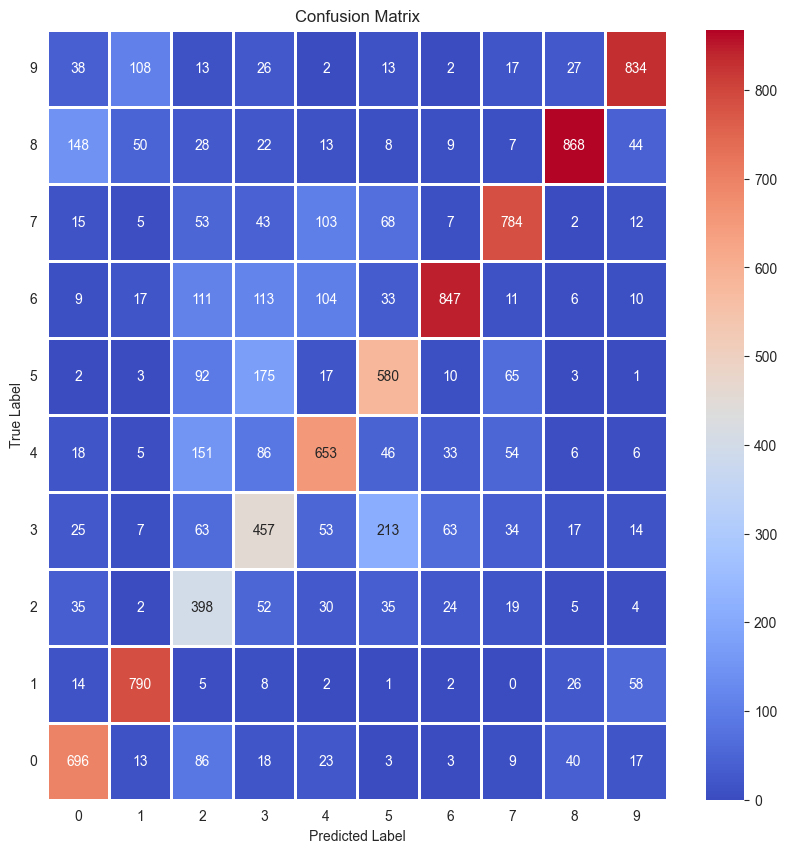

In [11]:
max_pred_y = np.argmax(pred_y, axis=1)
max_test_y = np.argmax(test_y, axis=1)
show_confusion_matrix(max_pred_y, max_test_y, num_class)

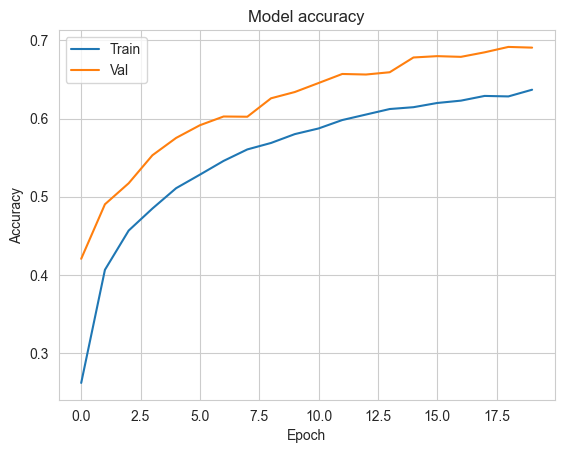

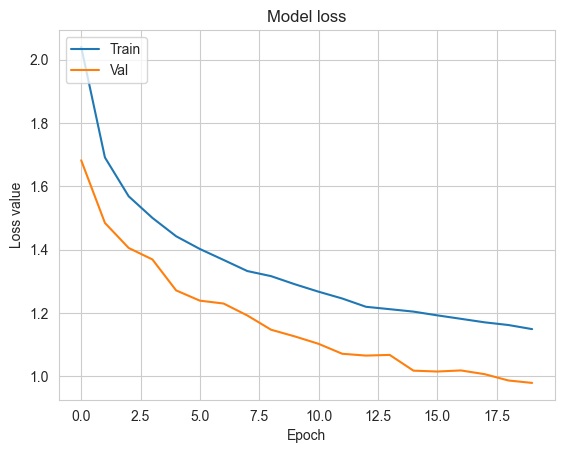

In [12]:
acc = history.history['acc']
loss = history.history['loss']

val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(acc)
plt.plot(val_acc)
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.figure()
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss value')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()